In [3]:
!pip install kaggle

In [54]:
import pandas as pd

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [87]:

# Download dataset
!kaggle competitions download -c digit-recognizer

# Read CSV without saving permanently
import zipfile

with zipfile.ZipFile("digit-recognizer.zip", "r") as z:
    with z.open("train.csv") as f:
        df = pd.read_csv(f)

df.head()   


digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [88]:
df.shape

(42000, 785)

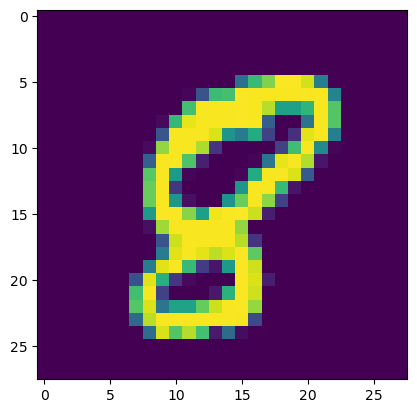

In [89]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[1567,1:].values.reshape(28,28))

In [90]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [92]:
X_train.shape

(33600, 784)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
import time
start  = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

6.769053220748901


In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9665476190476191

In [96]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [102]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [103]:
knn_trf = KNeighborsClassifier()
knn_trf.fit(X_train_trf,y_train)
y_pred_trf = knn_trf.predict(X_test_trf)
accuracy_score(y_test,y_pred_trf)

0.876547619047619

In [101]:
X_train_trf.shape

(33600, 400)

In [105]:
for i in range(1,100):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.fit_transform(X_test)
    knn_trf = KNeighborsClassifier()
    knn_trf.fit(X_train_trf,y_train)
    y_pred_trf = knn_trf.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred_trf))


0.26571428571428574
0.41678571428571426
0.4861904761904762
0.6009523809523809
0.7171428571428572
0.8115476190476191
0.851547619047619
0.8782142857142857
0.8945238095238095
0.9125
0.9142857142857143
0.9188095238095239
0.9186904761904762
0.9203571428571429
0.9261904761904762
0.9377380952380953
0.9189285714285714
0.9022619047619047
0.8794047619047619
0.8864285714285715
0.8919047619047619
0.8963095238095238
0.9019047619047619
0.9061904761904762
0.9078571428571428
0.91
0.9134523809523809
0.9025
0.8966666666666666
0.9014285714285715
0.8972619047619048
0.8994047619047619
0.9020238095238096
0.9030952380952381
0.9
0.9047619047619048
0.9040476190476191
0.9040476190476191
0.9023809523809524
0.903452380952381
0.9020238095238096
0.8994047619047619
0.8980952380952381
0.8973809523809524
0.8940476190476191
0.8939285714285714
0.8947619047619048
0.8933333333333333
0.893095238095238
0.8929761904761905
0.8925
0.8914285714285715
0.8911904761904762
0.8904761904761904
0.8895238095238095
0.8901190476190476
0.

In [106]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [108]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1], color = y_train_trf, color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [110]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [112]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2] ,color = y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [116]:
pca.explained_variance_
# eigen values

array([328362.59393687, 251209.69148633, 212339.80308601])

In [117]:
pca.components_.shape
# eigen values

(3, 784)

In [119]:
pca.explained_variance_ratio_*100

array([9.602762  , 7.34647284, 6.20974688])

In [121]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [122]:
pca.explained_variance_.shape

(784,)

In [124]:
pca.components_.shape

(784, 784)

In [125]:
pca.explained_variance_ratio_

array([9.60276200e-02, 7.34647284e-02, 6.20974688e-02, 5.42081268e-02,
       4.80535735e-02, 4.22369295e-02, 3.21842654e-02, 2.94871067e-02,
       2.72371672e-02, 2.36249136e-02, 2.10737646e-02, 2.07971865e-02,
       1.69850529e-02, 1.65894389e-02, 1.61687999e-02, 1.49825702e-02,
       1.35533998e-02, 1.29384027e-02, 1.16978925e-02, 1.16236610e-02,
       1.08612552e-02, 1.01028487e-02, 9.75923631e-03, 9.29936845e-03,
       9.07892431e-03, 8.35219732e-03, 8.06775978e-03, 7.80178589e-03,
       7.42051863e-03, 6.87875222e-03, 6.50049920e-03, 6.27318360e-03,
       6.05332369e-03, 5.82491646e-03, 5.63689705e-03, 5.45319127e-03,
       5.03097406e-03, 4.92312841e-03, 4.83822647e-03, 4.66240568e-03,
       4.52092527e-03, 4.45179432e-03, 4.08135861e-03, 4.05617956e-03,
       3.84154093e-03, 3.74970102e-03, 3.61242656e-03, 3.49187507e-03,
       3.35531556e-03, 3.24092069e-03, 3.19221131e-03, 3.03108971e-03,
       2.92277192e-03, 2.88450767e-03, 2.80618118e-03, 2.71307311e-03,
      

In [126]:
import numpy as np

np.cumsum(pca.explained_variance_ratio_)

array([0.09602762, 0.16949235, 0.23158982, 0.28579794, 0.33385152,
       0.37608845, 0.40827271, 0.43775982, 0.46499699, 0.4886219 ,
       0.50969566, 0.53049285, 0.5474779 , 0.56406734, 0.58023614,
       0.59521871, 0.60877211, 0.62171052, 0.63340841, 0.64503207,
       0.65589332, 0.66599617, 0.67575541, 0.68505478, 0.6941337 ,
       0.7024859 , 0.71055366, 0.71835544, 0.72577596, 0.73265472,
       0.73915521, 0.7454284 , 0.75148172, 0.75730664, 0.76294354,
       0.76839673, 0.7734277 , 0.77835083, 0.78318906, 0.78785146,
       0.79237239, 0.79682418, 0.80090554, 0.80496172, 0.80880326,
       0.81255296, 0.81616539, 0.81965726, 0.82301258, 0.8262535 ,
       0.82944571, 0.8324768 , 0.83539957, 0.83828408, 0.84109026,
       0.84380333, 0.84649782, 0.84906418, 0.85159075, 0.85406839,
       0.85650398, 0.85888518, 0.8611817 , 0.86331881, 0.8654524 ,
       0.86753078, 0.86956451, 0.87150751, 0.87341131, 0.87530544,
       0.87716354, 0.87901001, 0.88080195, 0.88252733, 0.88420

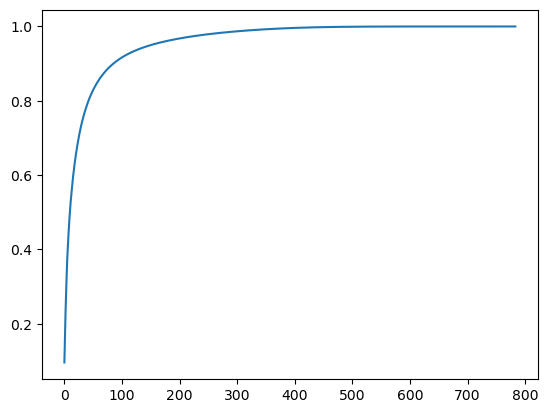

In [127]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# When doesn't help when variance across all axis is same. 